In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Important Library Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn

Dataset load

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NSU/Project fail/Project Failure-Responses (3).csv",encoding='cp1252')

In [ ]:
df

,Label,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
0,2,2,1,1,3,1,4,1,2,2,...,4,4,3,1,5,2,3,2,5,2.22
1,2,1,3,2,2,1,4,2,2,5,...,4,2,3,4,5,4,5,1,4,2.78
2,3,2,1,1,3,2,1,2,3,4,...,1,5,4,1,2,5,2,1,1,3.11
3,2,2,5,3,3,2,4,1,4,2,...,4,4,1,5,5,4,3,2,3,2.78
4,2,2,5,1,1,2,3,1,2,1,...,5,1,5,2,1,2,3,4,5,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,3,2,2,1,1,1,4,3,4,3,...,5,3,1,3,3,3,2,3,4,3.67
203,2,2,2,1,3,1,3,1,5,2,...,4,4,1,4,3,4,3,3,3,2.67
204,2,2,5,1,2,2,3,2,5,2,...,3,4,3,4,1,4,2,2,5,2.89
205,3,2,1,3,1,1,3,2,2,3,...,1,1,3,3,3,3,5,4,1,3.56


In [ ]:
#df=df.drop(0,axis=0)

In [ ]:
df

,Label,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
0,2,2,1,1,3,1,4,1,2,2,...,4,4,3,1,5,2,3,2,5,2.22
1,2,1,3,2,2,1,4,2,2,5,...,4,2,3,4,5,4,5,1,4,2.78
2,3,2,1,1,3,2,1,2,3,4,...,1,5,4,1,2,5,2,1,1,3.11
3,2,2,5,3,3,2,4,1,4,2,...,4,4,1,5,5,4,3,2,3,2.78
4,2,2,5,1,1,2,3,1,2,1,...,5,1,5,2,1,2,3,4,5,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,3,2,2,1,1,1,4,3,4,3,...,5,3,1,3,3,3,2,3,4,3.67
203,2,2,2,1,3,1,3,1,5,2,...,4,4,1,4,3,4,3,3,3,2.67
204,2,2,5,1,2,2,3,2,5,2,...,3,4,3,4,1,4,2,2,5,2.89
205,3,2,1,3,1,1,3,2,2,3,...,1,1,3,3,3,3,5,4,1,3.56


Dataset shape (Number of row, number of column)

In [ ]:
df.shape

(207, 103)

label is the target column which we need to predict

In [ ]:
df['Label'].value_counts()

2    102
3    101
4      3
1      1
Name: Label, dtype: int64

In [ ]:
df.isnull().sum() #find missing data

Label                                                                                                  0
Gender                                                                                                 0
Age                                                                                                    0
Education                                                                                              0
Profession                                                                                             0
                                                                                                      ..
Poor project governance-    Conflcit of interest among managers & subordinates                         0
Poor project governance-   Failure of project mangers in accomlishing projectt goals and objectives    0
Poor project governance-   Poor controlling of  project activiites                                     0
Poor project governance-     Lack of re-planning and re

In [ ]:
df.isnull().values.any() #no missing data

False

In [ ]:
df.describe() #feature engineering 

,Label,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2.512077,1.550725,2.850242,1.922705,2.014493,1.541063,2.483092,1.961353,3.101449,3.053140,...,3.024155,3.140097,3.024155,2.908213,3.043478,2.975845,2.917874,2.826087,3.000000,2.977681
std,0.538425,0.498626,1.376568,0.778233,0.833045,0.499519,1.118448,0.793453,1.405381,1.442112,...,1.408847,1.363422,1.419147,1.450236,1.425511,1.373959,1.423799,1.396492,1.407332,0.444655
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.890000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.670000
50%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.330000
max,4.000000,2.000000,5.000000,3.000000,3.000000,2.000000,4.000000,3.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.110000


In [ ]:
df.corr() #feature selection

,Label,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
Label,1.000000,-0.097220,0.018826,-0.032516,0.059133,-0.132709,0.006387,0.046549,0.181207,0.321139,...,-0.035583,0.067117,0.110794,-0.101151,-0.092395,0.016801,0.029795,-0.042386,0.166565,0.841575
Gender,-0.097220,1.000000,0.050019,0.022663,0.062498,-0.110724,-0.044153,-0.093179,0.190049,-0.142159,...,-0.095041,-0.078338,-0.012030,0.016539,0.048103,0.111626,0.009315,-0.112755,-0.034588,-0.066026
Age,0.018826,0.050019,1.000000,-0.028983,0.044234,0.005457,0.050371,0.039119,0.040511,-0.005753,...,-0.010641,0.026752,0.016770,0.104936,-0.075827,-0.027588,-0.187110,-0.031291,0.085196,0.024015
Education,-0.032516,0.022663,-0.028983,1.000000,-0.020727,0.033179,-0.018240,-0.020584,0.024958,0.055582,...,-0.007144,-0.081245,0.089606,-0.040726,0.064304,0.034565,0.059958,-0.159829,-0.062052,0.004109
Profession,0.059133,0.062498,0.044234,-0.020727,1.000000,-0.100596,-0.049232,-0.035869,0.060934,0.003397,...,-0.174020,0.224726,-0.172757,0.097542,-0.020972,0.025755,-0.052197,0.010523,-0.078672,0.004940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Poor project governance- Conflcit of interest among managers & subordinates,0.016801,0.111626,-0.027588,0.034565,0.025755,0.075719,0.023425,0.030309,0.132003,0.047200,...,-0.034807,0.121018,0.032666,0.047607,0.030281,1.000000,-0.045686,0.020570,-0.145610,0.070069
Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,0.029795,0.009315,-0.187110,0.059958,-0.052197,0.090083,-0.063368,0.010068,-0.078300,0.013957,...,-0.023207,-0.004047,-0.083100,-0.003668,0.085479,-0.045686,1.000000,0.002548,0.067834,0.046624
Poor project governance- Poor controlling of project activiites,-0.042386,-0.112755,-0.031291,-0.159829,0.010523,0.114671,0.022972,0.020191,-0.057749,-0.046008,...,-0.059538,0.086796,-0.022364,-0.051065,-0.066900,0.020570,0.002548,1.000000,-0.155610,-0.085160
Poor project governance- Lack of re-planning and re-designing of modified proejct activities,0.166565,-0.034588,0.085196,-0.062052,-0.078672,-0.006905,-0.024672,0.086945,0.068723,0.045446,...,0.012242,-0.118906,0.026736,0.019028,-0.024197,-0.145610,0.067834,-0.155610,1.000000,0.168877


Feature Selection heatmap

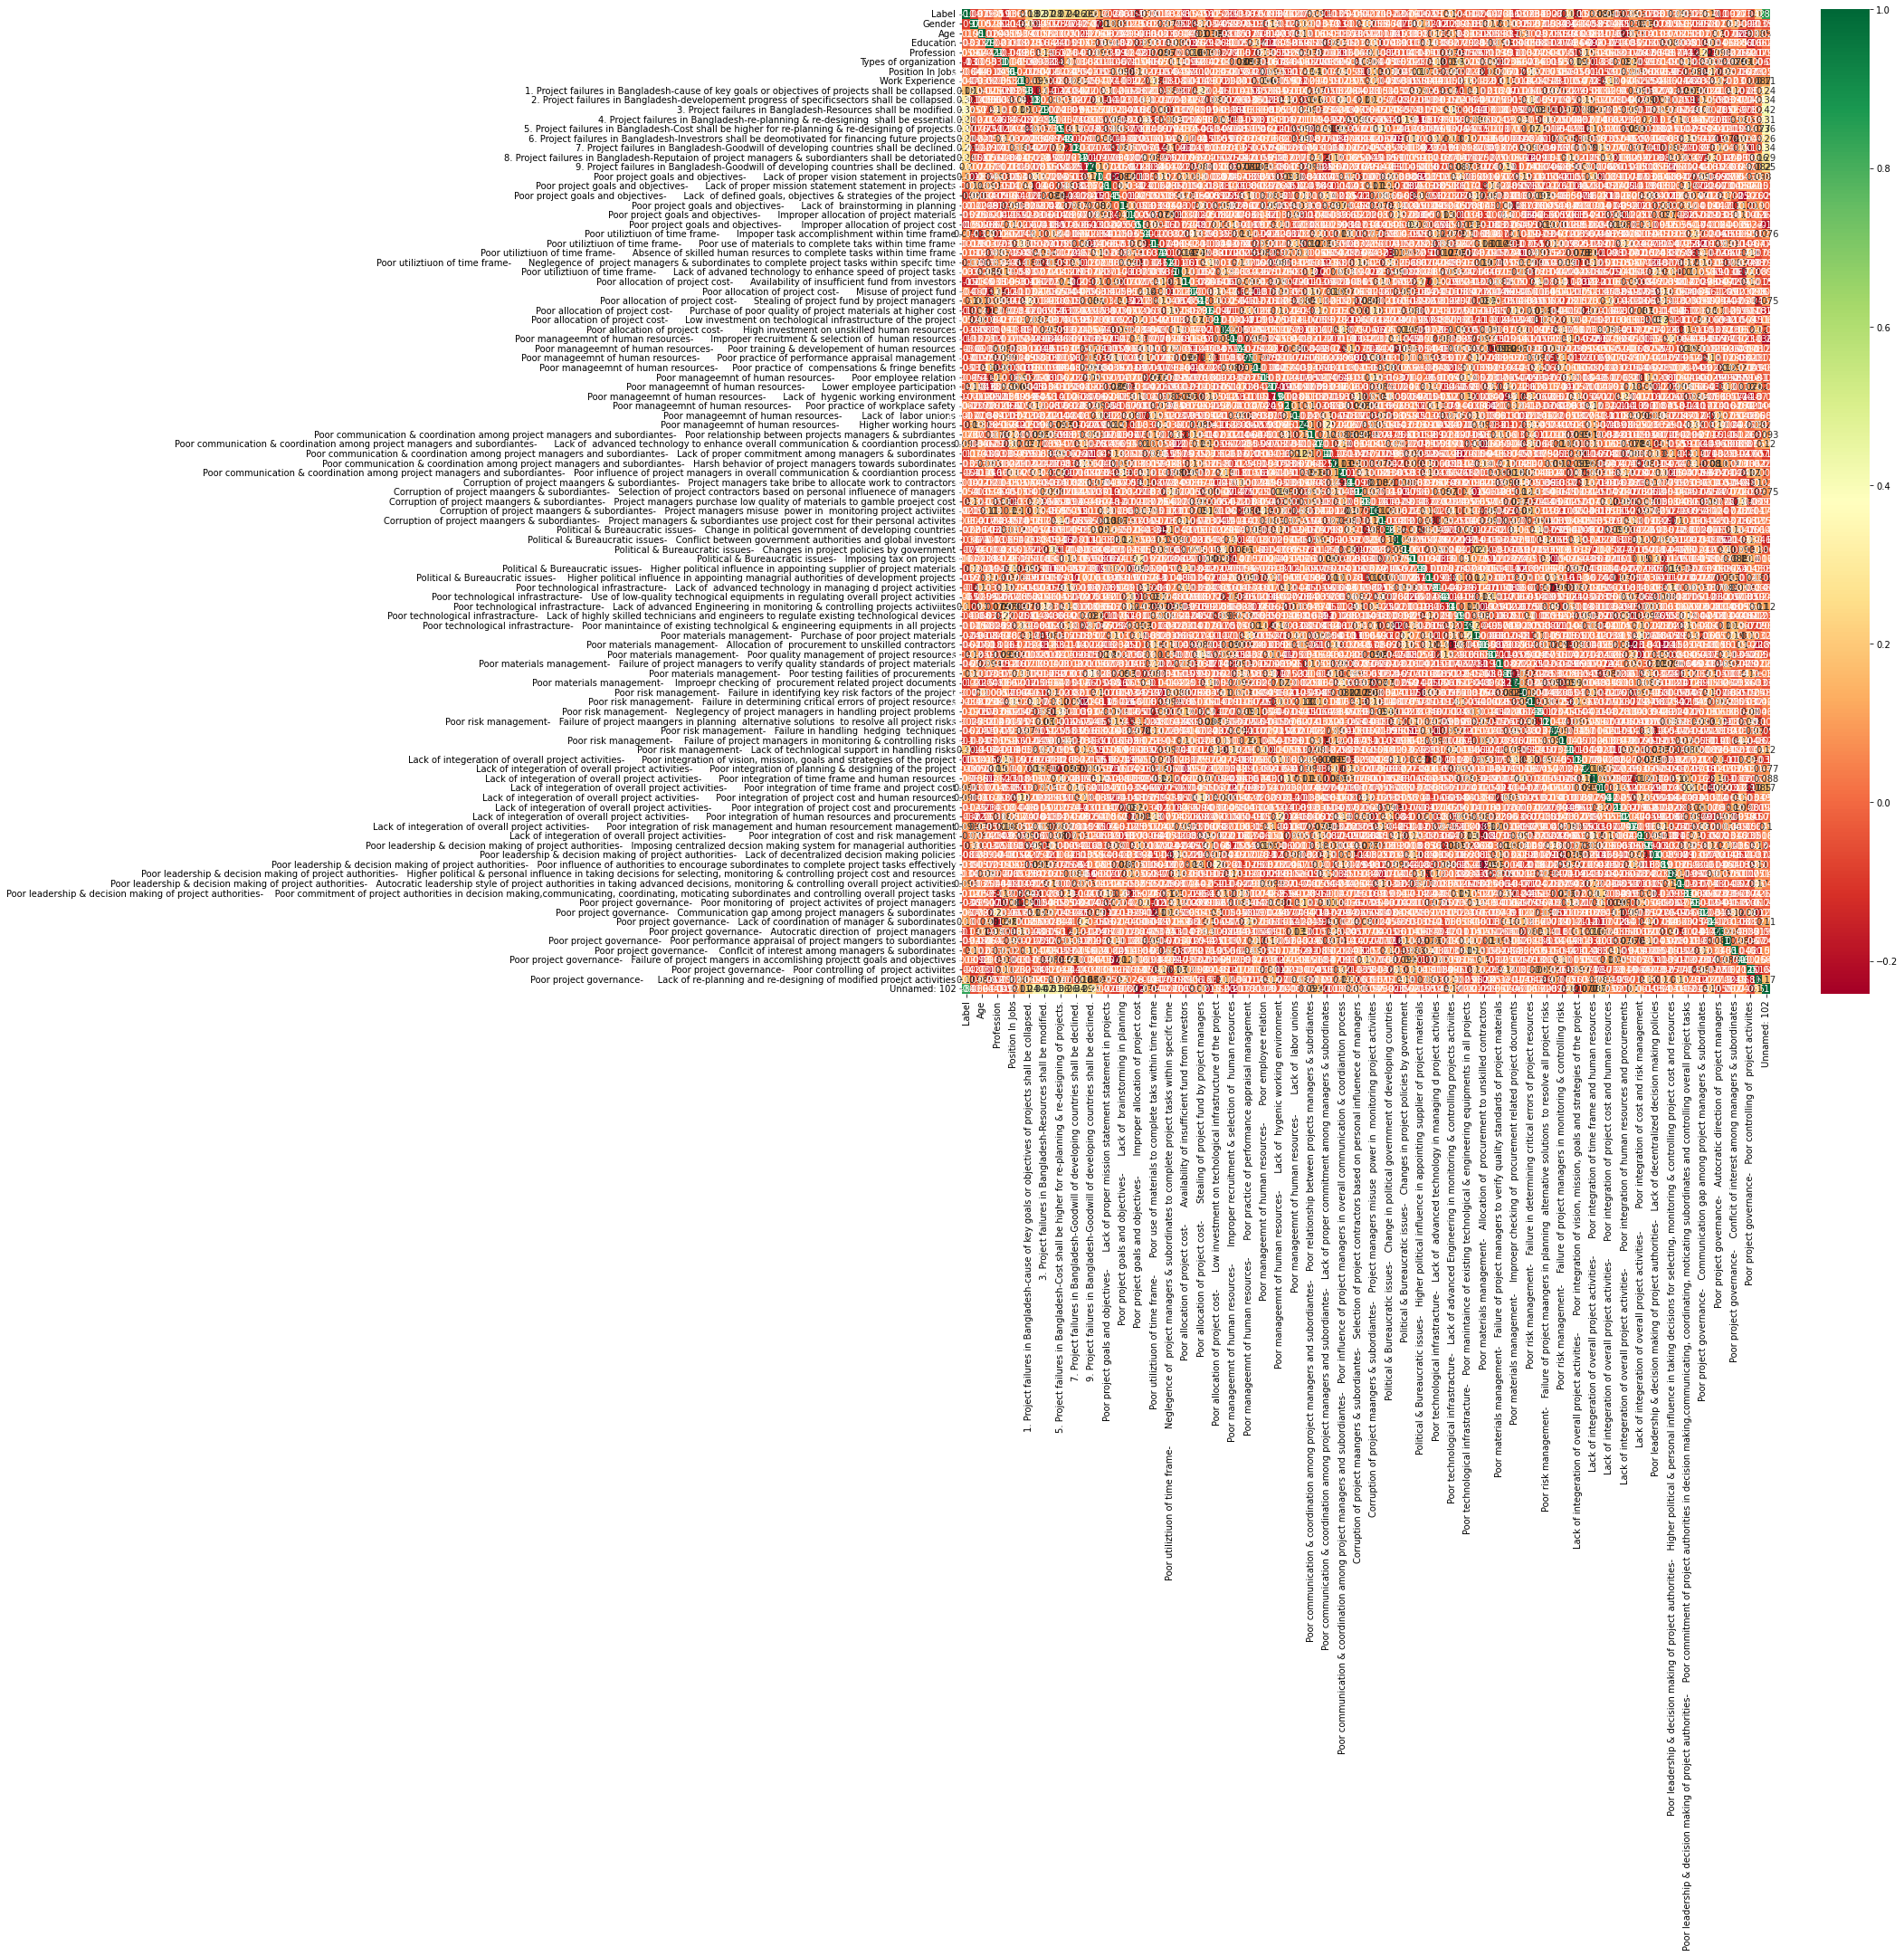

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
! pip install imblearn #imbalance library load

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Without target column save all column as features and target column as label

In [ ]:
features = df.iloc[:,1:] 
label=df['Label']

In [ ]:
features.shape, label.shape #shape check

((207, 102), (207,))

In [ ]:
features

,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,3. Project failures in Bangladesh-Resources shall be modified.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
0,2,1,1,3,1,4,1,2,2,2,...,4,4,3,1,5,2,3,2,5,2.22
1,1,3,2,2,1,4,2,2,5,2,...,4,2,3,4,5,4,5,1,4,2.78
2,2,1,1,3,2,1,2,3,4,5,...,1,5,4,1,2,5,2,1,1,3.11
3,2,5,3,3,2,4,1,4,2,4,...,4,4,1,5,5,4,3,2,3,2.78
4,2,5,1,1,2,3,1,2,1,2,...,5,1,5,2,1,2,3,4,5,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2,2,1,1,1,4,3,4,3,5,...,5,3,1,3,3,3,2,3,4,3.67
203,2,2,1,3,1,3,1,5,2,2,...,4,4,1,4,3,4,3,3,3,2.67
204,2,5,1,2,2,3,2,5,2,5,...,3,4,3,4,1,4,2,2,5,2.89
205,2,1,3,1,1,3,2,2,3,2,...,1,1,3,3,3,3,5,4,1,3.56


Data standardization Process

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(features)

In [ ]:
df3.shape

(207, 5355)

In [ ]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(features.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)

In [ ]:
output_df.head()

,Gender^1,Age^1,Education^1,Profession^1,Types of organization^1,Position In Jobs^1,Work Experience^1,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.^1,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.^1,3. Project failures in Bangladesh-Resources shall be modified.^1,...,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives^2,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives^1xPoor project governance- Poor controlling of project activiites^1,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives^1xPoor project governance- Lack of re-planning and re-designing of modified proejct activities^1,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives^1xUnnamed: 102^1,Poor project governance- Poor controlling of project activiites^2,Poor project governance- Poor controlling of project activiites^1xPoor project governance- Lack of re-planning and re-designing of modified proejct activities^1,Poor project governance- Poor controlling of project activiites^1xUnnamed: 102^1,Poor project governance- Lack of re-planning and re-designing of modified proejct activities^2,Poor project governance- Lack of re-planning and re-designing of modified proejct activities^1xUnnamed: 102^1,Unnamed: 102^2
0,2.0,1.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,2.0,...,9.0,6.0,15.0,6.66,4.0,10.0,4.44,25.0,11.10,4.9284
1,1.0,3.0,2.0,2.0,1.0,4.0,2.0,2.0,5.0,2.0,...,25.0,5.0,20.0,13.90,1.0,4.0,2.78,16.0,11.12,7.7284
2,2.0,1.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,...,4.0,2.0,2.0,6.22,1.0,1.0,3.11,1.0,3.11,9.6721
3,2.0,5.0,3.0,3.0,2.0,4.0,1.0,4.0,2.0,4.0,...,9.0,6.0,9.0,8.34,4.0,6.0,5.56,9.0,8.34,7.7284
4,2.0,5.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,...,9.0,12.0,15.0,8.01,16.0,20.0,10.68,25.0,13.35,7.1289


In [ ]:
features

,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,3. Project failures in Bangladesh-Resources shall be modified.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
0,2,1,1,3,1,4,1,2,2,2,...,4,4,3,1,5,2,3,2,5,2.22
1,1,3,2,2,1,4,2,2,5,2,...,4,2,3,4,5,4,5,1,4,2.78
2,2,1,1,3,2,1,2,3,4,5,...,1,5,4,1,2,5,2,1,1,3.11
3,2,5,3,3,2,4,1,4,2,4,...,4,4,1,5,5,4,3,2,3,2.78
4,2,5,1,1,2,3,1,2,1,2,...,5,1,5,2,1,2,3,4,5,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2,2,1,1,1,4,3,4,3,5,...,5,3,1,3,3,3,2,3,4,3.67
203,2,2,1,3,1,3,1,5,2,2,...,4,4,1,4,3,4,3,3,3,2.67
204,2,5,1,2,2,3,2,5,2,5,...,3,4,3,4,1,4,2,2,5,2.89
205,2,1,3,1,1,3,2,2,3,2,...,1,1,3,3,3,3,5,4,1,3.56


In [ ]:
X=features #rename features as X

In [ ]:
X

,Gender,Age,Education,Profession,Types of organization,Position In Jobs,Work Experience,1. Project failures in Bangladesh-cause of key goals or objectives of projects shall be collapsed.,2. Project failures in Bangladesh-developement progress of specificsectors shall be collapsed.,3. Project failures in Bangladesh-Resources shall be modified.,...,Poor project governance- Poor monitoring of project activites of project managers,Poor project governance- Communication gap among project managers & subordinates,Poor project governance- Lack of coordination of manager & subordinates,Poor project governance- Autocratic direction of project managers,Poor project governance- Poor performance appraisal of project mangers to subordiantes,Poor project governance- Conflcit of interest among managers & subordinates,Poor project governance- Failure of project mangers in accomlishing projectt goals and objectives,Poor project governance- Poor controlling of project activiites,Poor project governance- Lack of re-planning and re-designing of modified proejct activities,Unnamed: 102
0,2,1,1,3,1,4,1,2,2,2,...,4,4,3,1,5,2,3,2,5,2.22
1,1,3,2,2,1,4,2,2,5,2,...,4,2,3,4,5,4,5,1,4,2.78
2,2,1,1,3,2,1,2,3,4,5,...,1,5,4,1,2,5,2,1,1,3.11
3,2,5,3,3,2,4,1,4,2,4,...,4,4,1,5,5,4,3,2,3,2.78
4,2,5,1,1,2,3,1,2,1,2,...,5,1,5,2,1,2,3,4,5,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2,2,1,1,1,4,3,4,3,5,...,5,3,1,3,3,3,2,3,4,3.67
203,2,2,1,3,1,3,1,5,2,2,...,4,4,1,4,3,4,3,3,3,2.67
204,2,5,1,2,2,3,2,5,2,5,...,3,4,3,4,1,4,2,2,5,2.89
205,2,1,3,1,1,3,2,2,3,2,...,1,1,3,3,3,3,5,4,1,3.56


In [ ]:
y=label #rename label as y

In [ ]:
y

0      2
1      2
2      3
3      2
4      2
      ..
202    3
203    2
204    2
205    3
206    3
Name: Label, Length: 207, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

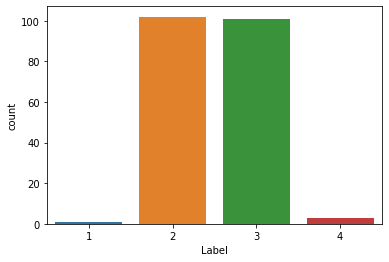

In [ ]:
sns.countplot(y) #visualize target column

In [ ]:
from sklearn.model_selection import train_test_split #train test split library

We took 80% random data for training and 20% random data for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size = 0.2) 

Model library import

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [ ]:
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import confusion_matrix

**Model 2: GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBClassifier

grad_model = GradientBoostingClassifier()
grad_model.fit(X_train_s,y_train)

GradientBoostingClassifier()

In [ ]:
grad_model.score(X_train_s,y_train)

1.0

In [ ]:
y_pred_grad = grad_model.predict(X_test_s)
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



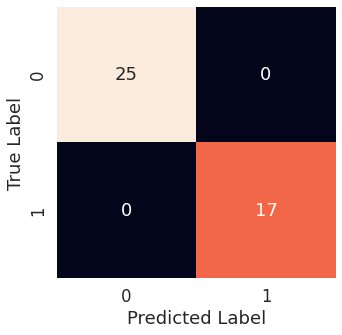

In [ ]:
conf_matrix(y_test, y_pred_grad)

**Model 3: AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_s,y_train)

AdaBoostClassifier()

In [ ]:
ada.score(X_train_s,y_train)

1.0

In [ ]:
y_pred_ada = ada.predict(X_test_s)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



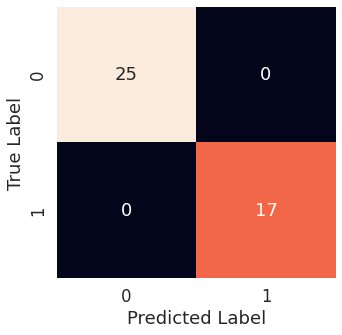

In [ ]:
conf_matrix(y_test, y_pred_ada)

**Model 4: KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train_s,y_train)

In [ ]:
knn.score(X_train_s,y_train)

0.7757575757575758

In [ ]:
y_pred_knn = knn.predict(X_test_s)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           2       0.81      0.52      0.63        25
           3       0.54      0.82      0.65        17

    accuracy                           0.64        42
   macro avg       0.68      0.67      0.64        42
weighted avg       0.70      0.64      0.64        42



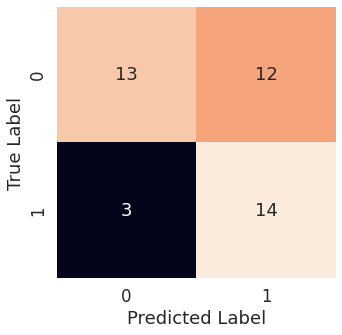

In [ ]:
conf_matrix(y_test, y_pred_knn)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBClassifier

Model 5: MLPClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
cf = MLPClassifier(random_state=42)
params_MLP = {
        "hidden_layer_sizes":[64,128,256],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100,200],
        "warm_start":[True]
}

In [ ]:
model_MLP = GridSearchCV(cf,param_grid=params_MLP, cv=3,n_jobs=-1)
model_MLP.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [64, 128, 256],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200],
                         'solver': ['lbfgs', 'sgd', 'adam'],
                         'warm_start': [True]})

In [ ]:
print("Best params: "+str(model_MLP.best_params_))
print("Best Score: "+str(model_MLP.best_score_)+'\n')

Best params: {'activation': 'tanh', 'hidden_layer_sizes': 64, 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam', 'warm_start': True}
Best Score: 0.6969696969696969



In [ ]:
y_train_pred_MLP = model_MLP.predict(X_train)
y_test_pred_MLP = model_MLP.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred_MLP))

              precision    recall  f1-score   support

           2       0.65      0.68      0.67        25
           3       0.50      0.47      0.48        17

    accuracy                           0.60        42
   macro avg       0.58      0.58      0.58        42
weighted avg       0.59      0.60      0.59        42



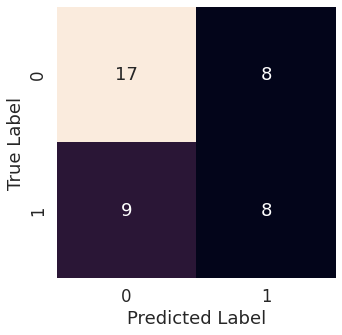

In [ ]:
conf_matrix(y_test, y_test_pred_MLP)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [ ]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train_s,y_train)

In [ ]:
y_pred_eclf1 = eclf1.predict(X_test_s)
print(classification_report(y_test, y_pred_eclf1))

              precision    recall  f1-score   support

           2       1.00      0.88      0.94        25
           3       0.85      1.00      0.92        17

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



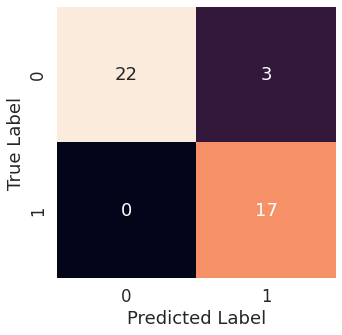

In [ ]:
conf_matrix(y_test, y_pred_eclf1)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_s,y_train)

SVC()

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
y_pred_svm = svm_model.predict(X_test_s)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           2       0.86      0.76      0.81        25
           3       0.70      0.82      0.76        17

    accuracy                           0.79        42
   macro avg       0.78      0.79      0.78        42
weighted avg       0.80      0.79      0.79        42



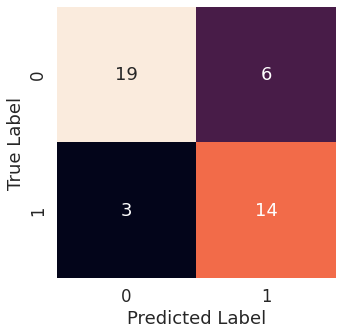

In [ ]:
conf_matrix(y_test, y_pred_svm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_s,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rfc = rfc.predict(X_test_s)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



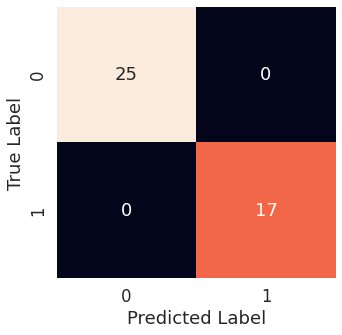

In [ ]:
conf_matrix(y_test, y_pred_rfc)